Выгрузка необходимых библиотек

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Выгрузка метрики

In [129]:
from metric import decision_prices

Выгрузка самописных функций

In [130]:
from functions.format_fu import rename, format_dates_column, clean_commas, m_and_k
from functions.main_fu import removing_columns, remove_unnecessary_columns, remove_outliers_iqr, plot_outliers

Снятие ограничения на отображение колонок/строк

In [131]:
# Снятие ограничения на отображение колонок
pd.set_option('display.max_columns', None)

In [132]:
# Снятие ограничения на отображение строк
# pd.set_option('display.max_rows', None)

Выгрузка исходных датафреймов

In [133]:
df1 = pd.read_csv('data\\CHMF Акции.csv')
df2 = pd.read_csv('data\\MAGN Акции.csv')
df3 = pd.read_csv('data\\NLMK Акции.csv')
df4 = pd.read_csv('data\\sample_submission.csv')
df5 = pd.read_csv('data\\Грузоперевозки.csv')
df6 = pd.read_csv('data\\Данные-рынка-стройматериалов.csv')
df7 = pd.read_csv('data\\Индекс-LME.csv')
df8 = pd.read_csv('data\\Макропоказатели.csv')
df9 = pd.read_csv('data\\Показатели-рынка-металла.csv')
df10 = pd.read_csv('data\\Топливо.csv', sep=';')
df11 = pd.read_csv('data\\Цены-на-сырье.csv')

Первичный анализ

In [134]:
df1.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/31/2023,"1,043.20","1,061.00","1,061.00","1,042.00",571.72K,-1.68%
1,03/30/2023,"1,061.00","1,074.60","1,084.80","1,058.00",1.30M,-1.27%
2,03/29/2023,"1,074.60","1,040.60","1,078.40","1,035.40",1.79M,3.53%
3,03/28/2023,"1,038.00","1,041.40","1,044.00","1,033.00",269.09K,-0.17%
4,03/27/2023,"1,039.80","1,036.20","1,042.60","1,032.20",410.74K,0.50%


In [135]:
df2.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,31.03.2023,"39,69","40,21","40,24","39,52","18,23M","-1,38%"
1,30.03.2023,"40,24","40,60","41,00","40,02","27,14M","-0,87%"
2,29.03.2023,"40,60","39,15","40,65","38,96","48,70M","3,70%"
3,28.03.2023,"39,15","39,45","39,75","38,91","17,02M","-0,62%"
4,27.03.2023,"39,40","38,99","39,48","38,92","20,95M","1,26%"


In [136]:
df3.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/31/2023,129.32,130.60,130.60,128.36,3.54M,-0.98%
1,03/30/2023,130.60,132.30,133.44,129.80,4.85M,-0.94%
2,03/29/2023,131.84,128.00,134.44,127.10,10.37M,3.37%
3,03/28/2023,127.54,128.58,128.94,126.56,2.27M,-0.50%
4,03/27/2023,128.18,127.00,128.42,126.86,2.81M,1.33%


In [137]:
df4.head()

,dt,Цена на арматуру,Объем
0,2022-09-05 00:00:00,46000,2
1,2022-09-12 00:00:00,46000,0
2,2022-09-19 00:00:00,46000,2
3,2022-09-26 00:00:00,45500,0
4,2022-10-03 00:00:00,45500,2


In [138]:
df5.head()

,dt,Индекс стоимости грузоперевозок
0,1970-01-01 03:00:43,"1,000"
1,1970-01-01 03:00:43,991
2,1970-01-01 03:00:43,992
3,1970-01-01 03:00:43,979
4,1970-01-01 03:00:43,985


In [139]:
df6.head()

,dt,Импорт цемента ЖД,Экспорт цемента ЖД,Отгрузка цемента хоппер ЖД,Отгрузка цемента остальные ЖД,Производство цемента,Импорт цемента,Экспорт цемента,Потребление цемента,Отгрузка цемента,Цена цемента с НДС,Цена цемента без НДС,Производство бетона РФ,Производство бетона МО,Производство бетона СПБ
0,1970-01-01 03:00:44,40.75,27.53,987.54,201.76,2.39,52.33,31.49,2.29,1.19,"3,769.20","4,968.10",1.92,223.41,198.59
1,1970-01-01 03:00:44,69.98,43.42,"1,071.83",256.73,2.71,79.64,50.16,2.67,1.33,"3,745.23","4,822.46",2.06,293.41,162.18
2,1970-01-01 03:00:44,105.53,58.23,"1,495.35",446.95,3.85,125.59,64.99,3.98,1.94,"3,790.64","5,299.51",2.84,424.11,254.89
3,1970-01-01 03:00:44,125.09,88.93,"1,754.58",573.13,4.86,182.18,105.97,4.93,2.33,"3,853.30","5,031.96",3.30,492.62,301.09
4,1970-01-01 03:00:44,124.44,112.45,"1,859.55",659.93,5.72,193.68,141.09,5.76,2.52,"3,915.07","5,240.72",3.79,562.72,303.96


In [140]:
df7.head()

,дата,цена
0,2/12/2021,607
1,2/15/2021,614
2,2/16/2021,615
3,2/17/2021,606
4,2/18/2021,604


In [141]:
df8.head()

,dt,Ключевая ставка,Курс доллара
0,2016-01-31 00:00:00,NaN,NaN
1,2016-02-29 00:00:00,NaN,NaN
2,2016-03-31 00:00:00,NaN,NaN
3,2016-04-30 00:00:00,NaN,NaN
4,2016-05-31 00:00:00,NaN,NaN


In [142]:
df9.head()

,dt,Производство арматуры Сортовой прокат_Арматура,Производство арматуры Сортовой прокат_Катанка,Производство арматуры Сортовой прокат_Прутки прочие,Производство сырья ЖРС_Агломерат,Производство сырья ЖРС_Аглоруда,Производство сырья ЖРС_Концентрат,Производство сырья ЖРС_Концентрат для дообогащения,Производство сырья ЖРС_Окатыши,Производство сырья Кокс_Кокс валовый,Производство сырья Концентрат коксующегося угля_Жирные,Производство сырья Концентрат коксующегося угля_Коксовые,Производство сырья Концентрат коксующегося угля_Отощающие,Производство сырья Металлизованная продукция_ГБЖ,Производство сырья Металлизованная продукция_ПВЖ,Производство сырья Рядовой коксующийся уголь_Газовые,Производство сырья Рядовой коксующийся уголь_Жирные,Производство сырья Рядовой коксующийся уголь_Коксовые,Производство сырья Рядовой коксующийся уголь_Отощающие,Производство сырья Сталь_Конвертер,Производство сырья Сталь_Мартен,Производство сырья Сталь_Сталь всего,Производство сырья Сталь_Электропечь,Производство сырья Чугун_Чугун,ПотреблениеЖРС_Концентрат,ПотреблениеЖРС_Агломерат,ПотреблениеЖРС_Окатыши,ПотреблениеЖРС_Концентрат для дообогащения,ПотреблениеЖРС_Аглоруда,Поставки Сортовой прокат_Арматура,Поставки Сортовой прокат_Катанка,Поставки Сортовой прокат_Прутки прочие,Поставки Концентрат коксующегося угля_Жирные,Поставки Концентрат коксующегося угля_Коксовые,Поставки Концентрат коксующегося угля_Отощающие,Поставки Кокс_Кокс доменный,Поставки Чугун_Литейный чугун,Поставки Чугун_Передельный чугун,Поставки ЖРС_Агломерат,Поставки ЖРС_Аглоруда,Поставки ЖРС_Концентрат,Поставки ЖРС_Концентрат для дообогащения,Поставки ЖРС_Окатыши,Спрос ЖРС_Агломерат,Спрос ЖРС_Аглоруда,Спрос ЖРС_Концентрат,Спрос ЖРС_Концентрат для дообогащения,Спрос ЖРС_Окатыши,Спрос Металлизованная продукция_ГБЖ,Спрос Кокс_Кокс доменный,Спрос Концентрат коксующегося угля_Жирные,Спрос Концентрат коксующегося угля_Коксовые,Спрос Концентрат коксующегося угля_Отощающие,Импорт сырья ЖРС_Концентрат,Импорт сырья ЖРС_Окатыши,Импорт сырья Концентрат коксующегося угля_Жирные,Импорт сырья Концентрат коксующегося угля_Коксовые,Импорт арматуры Сортовой прокат_Арматура,Импорт арматуры Сортовой прокат_Катанка,Импорт арматуры Сортовой прокат_Прутки прочие,Экспорт сырья ЖРС_Агломерат,Экспорт сырья ЖРС_Аглоруда,Экспорт сырья ЖРС_Концентрат,Экспорт сырья ЖРС_Окатыши,Экспорт сырья Кокс_Кокс доменный,Экспорт сырья Кокс_Мелочь коксовая,Экспорт сырья Кокс_Орешек коксовый,Экспорт сырья Концентрат коксующегося угля_Жирные,Экспорт сырья Концентрат коксующегося угля_Коксовые,Экспорт сырья Концентрат коксующегося угля_Отощающие,Экспорт сырья Лом_Лом коррозионностойкой стали,Экспорт сырья Лом_Лом стальной,Экспорт сырья Лом_Лом чугуна,Экспорт сырья Металлизованная продукция_Всего отгружено с предприятия,Экспорт сырья Металлизованная продукция_ГБЖ,Экспорт сырья Чугун_Всего отгружено с предприятия,Экспорт сырья Чугун_Литейный чугун,Экспорт сырья Чугун_Передельный чугун,Экспорт арматуры Сортовой прокат_Арматура,Экспорт арматуры Сортовой прокат_Катанка,Экспорт арматуры Сортовой прокат_Прутки прочие
0,1970-01-01 03:00:42,527,208,191,"5,127",376,"9,063",631,"3,691","2,307","2,448","2,000",272,243,266,342,"3,886","1,815",931,"3,803",102,"5,543","1,636","4,250","3,666",383,"2,141",593,301,430,141,142,"1,569","1,635",49,407,2,45,384,301,"3,217",594,"2,006",384,301,"3,667",594,"2,142",39,416,"1,689","1,454",49,450,136,0,16,NaN,NaN,NaN,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,97,68,50
1,1970-01-01 03:00:42,563,231,216,"4,776",343,"8,850",608,"3,450","2,297","2,314","2,078",279,229,248,347,"3,759","1,887","1,176","3,653",78,"5,527","1,795","4,227","3,763",371,"2,226",599,323,447,151,160,"1,577","1,616",33,451,1,42,371,323,"3,313",599,"2,032",371,323,"3,763",599,"2,226",23,465,"1,688","1,467",33,450,194,0,23,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,79,55
2,1970-01-01 03:00:43,614,263,235,"5,107",420,"9,013",626,"3,849","2,481","2,720","2,326",301,243,266,394,"3,948","1,983","1,296","3,974",36,"5,954","1,942","4,626","3,784"

In [143]:
df10.head()

,"dt,Цена на бензин,Цена на дт"
0,"2017-02-28 00:00:00,35.91,36.15"
1,"2017-03-31 00:00:00,36.11,36.58"
2,"2017-04-30 00:00:00,36.41,36.69"
3,"2017-05-31 00:00:00,36.64,36.8"
4,"2017-06-30 00:00:00,36.91,36.87"


In [144]:
df11.head()

,dt,"Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС","Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т","Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Чугун_CFR Италия, $/т","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС","ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т","Лом_HMS 1/2 80:20, FOB США Восток, $/т","Лом_3А, FOB РФ Черное море, $/т","Чугун_FOB Бразилия Север, $/т","Лом_HMS 1/2 80:20, CFR ЮВА, $/т","Концентрат коксующегося угля_Россия марка КС FCA руб./т, без НДС","Лом_3А, РФ FCA ж/д респ. Татарстан, руб./т, без НДС","ЖРС_Российский концентрат Fe 62,5-67,5%, SiO2 0,78-8,51, сухой вес, DAP Забайкальск-Манжули, $/т","Концентрат коксующегося угля_Россия марка К и смеси марок К, КО FCA руб./т, без НДС","Кокс_Россия Урал Сибирь +25, FCA руб./т., без НДС","Лом_3А, РФ FCA ж/д Московский регион, руб./т, без НДС","Концентрат коксующегося угля_Россия марка Ж+ГЖ FCA руб./т, без НДС","Чугун_FOB Россия Черное море, $/т","ЖРС_Россия аглоруда Fe 52-60%, FCA руб./т, без НДС","ЖРС_Россия концентрат Fe 64-68%, FCA руб./т, без НДС","Чугун_Россия, FCA руб./т, без НДС","Концентрат коксующегося угля_HCC Австралия, $/t FOB","ЖРС_Россия окатыши Fe 62-65,5% FCA руб./т, без НДС","ГБЖ_CFR Италия, $/т","Лом_3А, РФ CPT ж/д Уральский ФО, руб./т, без НДС","Концентрат коксующегося угля_Россия марка Ж FCA руб./т, без НДС","Лом_HMS 1/2 80:20, CFR Турция, $/т","Чугун_CFR Китай, $/т","Концентрат коксующегося угля_Средняя шихта Россия FCA руб./т, без НДС","Концентрат коксующегося угля_Россия марка ГЖ FCA руб./т, без НДС","Чугун_CFR NOLA США, $/т","Чугун_CFR Турция, $/т","ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в концентрате, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в окатыши, Россия FCA руб./т, без НДС","ЖРС_Украинский концентрат Fe 65-68%, DAP граница Украины с Европой, $/т","ЖРС_Украинские окатыши Fe 65-66%, DAP граница Украины с Европой, $/т"
0,2015-02-09 00:00:00,3850,228,12344,10009,12728,62,NaN,3700.0,70.0,221,221,338,248,3300,11573,51.0,4500,6900,11870,4300,297,1325.0,2275.0,21250,106,3450.0,NaN,11598,4700.0,246,NaN,3890,3350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-02-16 00:00:00,3850,206,12271,10432,12852,63,NaN,3700.0,70.0,221,213,308,248,3300,11746,51.0,4500,6900,12088,4300,278,1325.0,2275.0,21250,106,3450.0,NaN,11794,4700.0,243,NaN,3890,3350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-02-23 00:00:00,3850,207,12645,11981,13034,64,NaN,3700.0,72.0,215,208,295,248,3300,11930,53.0,4500,6900,12503,4300,265,1325.0,2275.0,21250,103,3450.0,NaN,12047,4700.0,241,NaN,3890,3350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-03-02 00:00:00,3850,214,12696,11912,12910,63,NaN,3700.0,72.0,224,215,295,248,3300,12100,53.0,4500,6900,12439,4300,265,1325.0,2275.0,21250,103,3450.0,NaN,12253,4700.0,249,NaN,3890,3350.0,NaN,NaN,3540.0,2097.0,1261.0,23.0,NaN,NaN,NaN,NaN
4,2015-03-09 00:00:00,4400,232,12916,12061,12964,61,NaN,4050.0,70.0,229,221,275,248,3750,11774,51.0,4700,8750,12020,4100,265,1345.0,2425.0,15250,103,3500.0,NaN,12183,4700.0,257,NaN,4164,3525.0,NaN,NaN,3540.0,2097.0,1261.0,23.0,NaN,NaN,NaN,NaN


In [145]:
for i in [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]:
    na_counts = i.isna().sum()
    variable_name = [name for name, value in globals().items() if value is i][0]
    dct = na_counts[na_counts > 0].to_dict()
    print(f'Кол-во пропусков в колонках {variable_name}: {dct if dct != {} else 0}')

Кол-во пропусков в колонках df1: {'Vol.': 1}
Кол-во пропусков в колонках df2: 0
Кол-во пропусков в колонках df3: 0
Кол-во пропусков в колонках df4: 0
Кол-во пропусков в колонках df5: 0
Кол-во пропусков в колонках df6: 0
Кол-во пропусков в колонках df7: {'дата': 1}
Кол-во пропусков в колонках df8: {'Ключевая ставка': 307, 'Курс доллара': 334}
Кол-во пропусков в колонках df9: {'Импорт арматуры Сортовой прокат_Арматура': 12, 'Импорт арматуры Сортовой прокат_Катанка': 12, 'Импорт арматуры Сортовой прокат_Прутки прочие': 12}
Кол-во пропусков в колонках df10: 0


<Axes: >

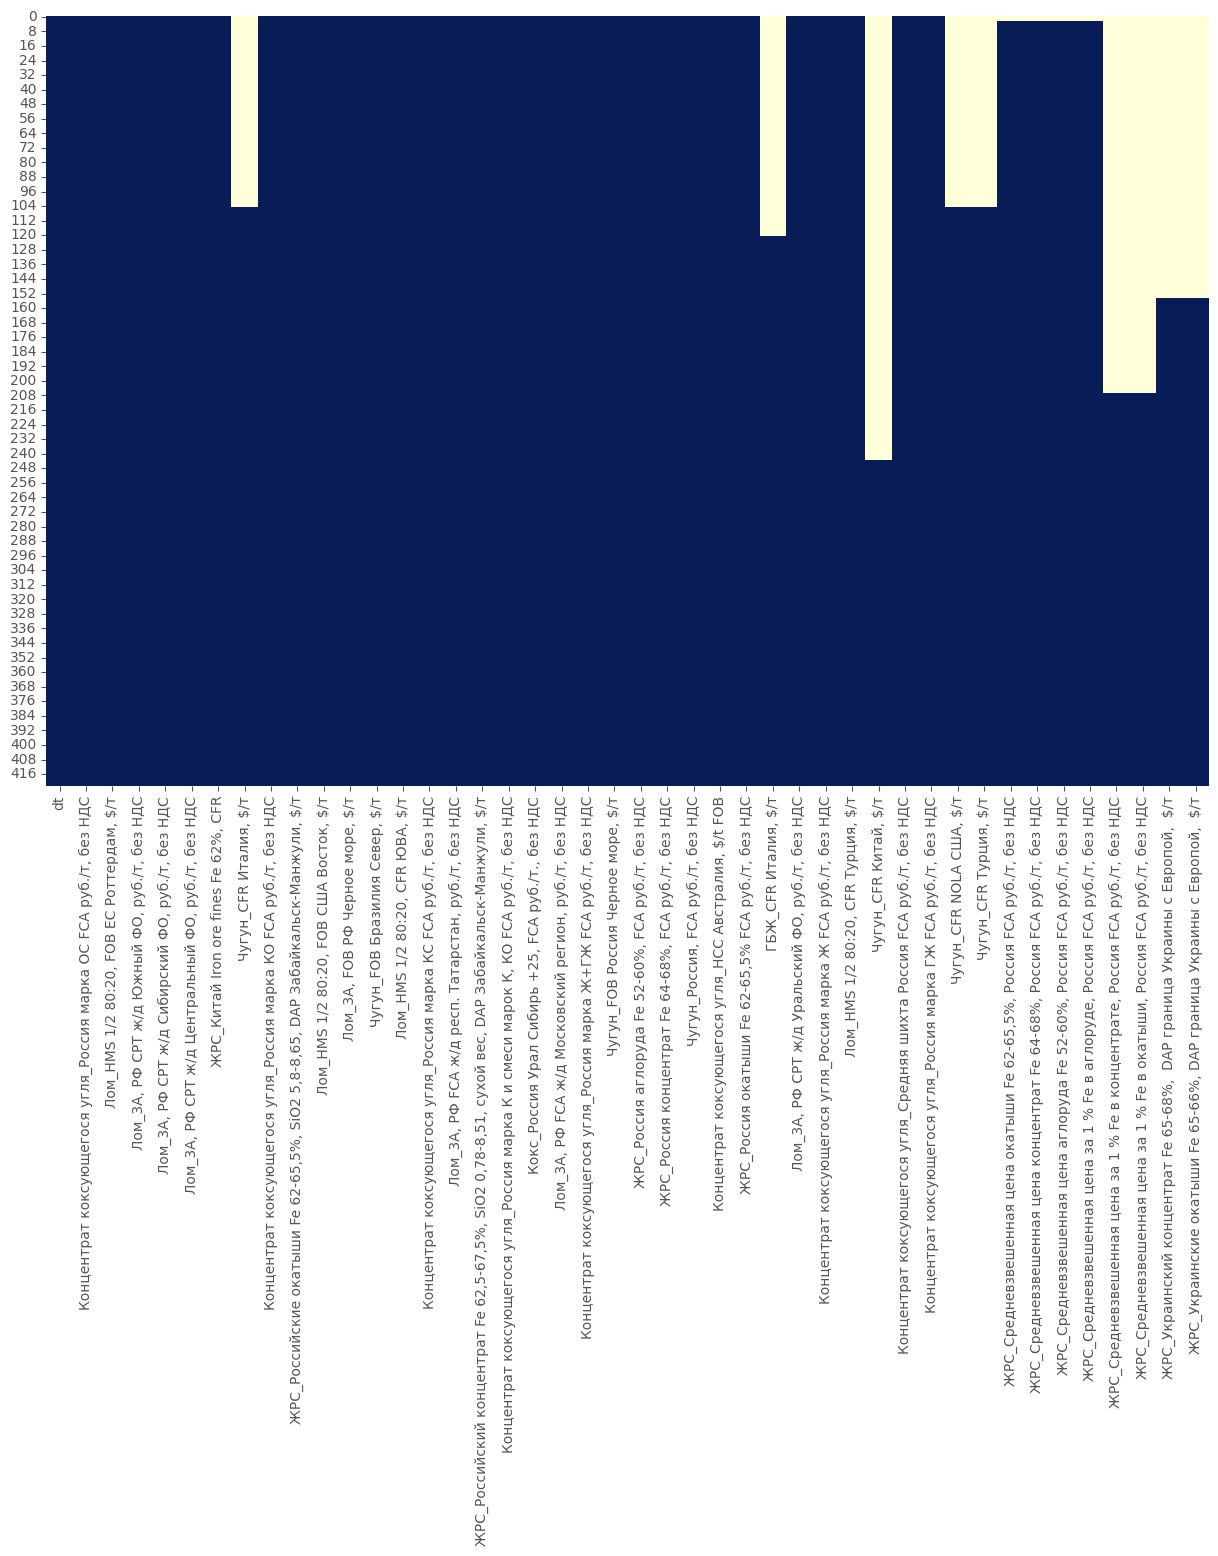

In [146]:
# Визуализация пропусков в данных
plt.figure(figsize = (15,10))
sns.heatmap(data = df11.isnull(),cmap="YlGnBu_r",cbar=False)

Преобразование столбцов в единый формат записи в датафрейме "Топливо"

In [147]:
try:
    # Преобразование столбцов в тип float
    df10['Цена на бензин'] = df10['Цена на бензин'].str.replace(',', '.').astype(float)
    df10['Цена на дт'] = df10['Цена на дт'].str.replace(',', '.').astype(float)

    # Изменили разделитель на запятую и сохраним файл
    df10.to_csv('data\\Топливо.csv', sep=',', index=False)
except:
    print("Данные уже изменены!")

Данные уже изменены!


Удаление столбцов в которых больше 70% пропусков

In [148]:
file_paths = [
    'data\\Макропоказатели.csv',
    'data\\Цены-на-сырье.csv'
    ]

for path in file_paths:
    removed = removing_columns(path)
    print(f"Файл {path}: удалено {removed} столбцов")

Файл data\Макропоказатели.csv: удалено 0 столбцов
Файл data\Цены-на-сырье.csv: удалено 0 столбцов


Переименование файлов и столбцов

In [149]:
rename()

Успешно обработан: data\CHMF Акции.csv -> rename_data\CHMF.csv
Успешно обработан: data\MAGN Акции.csv -> rename_data\MAGN.csv
Успешно обработан: data\NLMK Акции.csv -> rename_data\NLMK.csv
Успешно обработан: data\Индекс-LME.csv -> rename_data\индекс-LME.csv
Успешно обработан: data\Макропоказатели.csv -> rename_data\макропоказатели.csv
Успешно обработан: data\Топливо.csv -> rename_data\топливо.csv
Успешно обработан: data\Цены-на-сырье.csv -> rename_data\цены-на-сырье.csv


Приведение чисел в единый формат, удаление ненужных запятых в колонках

In [150]:
try:

    file_paths = [
        'rename_data\\CHMF.csv',
        'rename_data\\MAGN.csv',
        'rename_data\\NLMK.csv',
        ]

    # Удаление лишних запятых в остальных файлах, с помощью написанной функции
    for i in file_paths:
        clean_commas(i)

    print("Запятые успешно удалены, тип данных изменён.")
except Exception as e:
    print(f"Произошла ошибка при загрузке данных: {e}")

Запятые успешно удалены, тип данных изменён.


Удаление ненужных колонок в датафреймах акций

In [151]:
# Список файлов для обработки
files = [
    'rename_data/CHMF.csv',
    'rename_data/MAGN.csv',
    'rename_data/NLMK.csv'
    ]
    
# Колонки, которые нужно удалить
columns_to_drop = ['open', 'high_price', 'low_price']

remove_unnecessary_columns(files, columns_to_drop)

Форматирование чисел в файлах акций

In [152]:
for path in files:
    df = pd.read_csv(path)
    df['volume'] = df['volume'].apply(m_and_k)
    df.to_csv(path, sep=',', index=False)

Удаление ненужных колонок в датафрейме "цены-на-сырье"

In [153]:
columns_to_keep = [
    'dt',
    'ЖРС_Китай Iron ore fines Fe 62%, CFR',
    'ЖРС_Российские окатыши Fe 62-65,5%,SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т',
    'ЖРС_Россия концентрат Fe 64-68%, FCA руб./т, без НДС',
    'ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС',
    'Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС',
    'Концентрат коксующегося угля_Россия марка КС FCA руб./т, без НДС',
    'Концентрат коксующегося угля_HCC Австралия, $/t FOB',
    'Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т',
    'Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС',
    'Лом_3А, FOB РФ Черное море, $/т',
    'Чугун_CFR Италия, $/т',
    'Чугун_Россия, FCA руб./т, без НДС',
    'Чугун_FOB Россия Черное море, $/т',
    'ГБЖ_CFR Италия, $/т',
    'ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС',
    'ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС'
]

df = pd.read_csv('rename_data\\цены-на-сырье.csv', encoding='utf-8')

# Проверка наличия колонок в DataFrame
existing_columns = df.columns.tolist()
missing_columns = [col for col in columns_to_keep if col not in existing_columns]

if missing_columns:
    print(f'Предупреждение! Следующие колонки отсутствуют в файле:\n{missing_columns}')

# Фильтрация колонок
filtered_columns = [col for col in columns_to_keep if col in existing_columns]
df_filtered = df[filtered_columns]

# Сохранение результата
df_filtered.to_csv('rename_data\\processed_prices.csv', index=False, encoding='utf-8')
print('Файл успешно обработан и сохранен как: rename_data\\processed_prices.csv')

Предупреждение! Следующие колонки отсутствуют в файле:
['ЖРС_Российские окатыши Fe 62-65,5%,SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т']
Файл успешно обработан и сохранен как: rename_data\processed_prices.csv


Подготовка данных к объединению

In [154]:
# Функция для загрузки и подготовки данных
def load_and_prepare_prefix(file_path, prefix, decimal='.'):
    df = pd.read_csv(file_path, decimal=decimal)
    df['dt'] = pd.to_datetime(df['dt'])  # Конвертация в datetime
    df.columns = ['dt'] + [f'{prefix}_{col}' for col in df.columns if col != 'dt']
    return df

# Загрузка данных с переименованием колонок
chmf = load_and_prepare_prefix('rename_data\\CHMF.csv', 'CHMF')
magn = load_and_prepare_prefix('rename_data\\MAGN.csv', 'MAGN')
nlmk = load_and_prepare_prefix('rename_data\\NLMK.csv', 'NLMK')


def load_and_prepare(file_path, decimal='.'):
    df = pd.read_csv(file_path, decimal=decimal)
    df['dt'] = pd.to_datetime(df['dt'])  # Конвертация в datetime
    df.columns = ['dt'] + [col for col in df.columns if col != 'dt']
    return df

lme = load_and_prepare('rename_data\\индекс-LME.csv')
makro = load_and_prepare('rename_data\\макропоказатели.csv')
raw_materials = load_and_prepare('rename_data\\цены-на-сырье.csv')
fuel = load_and_prepare('rename_data\\топливо.csv')

C:\Users\artem\AppData\Local\Temp\ipykernel_3980\1763321644.py:4: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['dt'] = pd.to_datetime(df['dt'])  # Конвертация в datetime


Объединение датафреймов в 1 файл

In [155]:
merged_df = chmf.merge(magn, on='dt', how='outer').merge(nlmk, on='dt', how='outer').merge(lme, on='dt', how='outer').merge(makro, on='dt', how='outer').merge(raw_materials, on='dt', how='outer').merge(fuel, on='dt', how='outer')

# Сортировка по дате
merged_df = merged_df.sort_values(by='dt').reset_index(drop=True)

Удаление строк, где больше 5 пропусков

In [156]:
merged_df.dropna(thresh=6, inplace=True)

Заполнение пропусков

In [157]:
# Получаем список всех колонок, кроме dt
columns_to_fill = [col for col in merged_df.columns if col != "dt"]
    
# Заполняем пропуски во всех колонках независимо от их названия
merged_df[columns_to_fill] = merged_df[columns_to_fill].ffill()

# Сохранение результата
merged_df.to_csv('merged_df.csv', index=False)

...

In [158]:
na_counts = merged_df.isna().sum()
na_counts[na_counts > 0]

CHMF_price                                                                       204
CHMF_volume                                                                      204
CHMF_change_price                                                                204
MAGN_price                                                                       204
MAGN_volume                                                                      204
MAGN_change_price                                                                204
NLMK_price                                                                       204
NLMK_volume                                                                      204
NLMK_change_price                                                                204
lme_price                                                                        739
Ключевая ставка                                                                  153
Курс $                                                           

Удаление столбцов с большим кол-вом пропусков

In [159]:
merged_df = merged_df.drop(['lme_price', 'Чугун_CFR Китай, $/т'], axis=1).dropna()
merged_df.to_csv('merged_df.csv', index=False)

Кодирование данных

In [160]:
# Создаем копию исходного датафрейма для обработки
df_encoded = merged_df.copy()

# Обработка столбцов с процентами (включая замену запятых на точки)
percent_columns = [col for col in df_encoded.columns if '_change_price' in col]
for col in percent_columns:
    df_encoded[col] = (
        df_encoded[col]
        .astype(str)
        .str.replace('%', '', regex=False)  # Удаляем знак процента
        .str.replace(',', '.', regex=False)  # Заменяем запятые на точки
        .str.strip()  # Удаляем пробелы по краям
        .astype(float)
        / 100  # Конвертация в десятичные дроби
    )

# Преобразование остальных числовых столбцов (также обрабатываем запятые)
numeric_columns = df_encoded.columns.difference(['dt'] + percent_columns)
for col in numeric_columns:
    df_encoded[col] = (
        df_encoded[col]
        .astype(str)
        .str.replace(',', '.', regex=False)  # Заменяем запятые на точки
        .str.replace('[^\d.-]', '', regex=True)  # Удаляем все нецифровые символы кроме . и -
        .replace('', pd.NA)  # Заменяем пустые строки на NA
        .astype(float)
    )

# Вывод результатов
print("Первые строки закодированного датафрейма:")
print(df_encoded.head(2).to_string())

Первые строки закодированного датафрейма:
            dt  CHMF_price  CHMF_volume  CHMF_change_price  MAGN_price  MAGN_volume  MAGN_change_price  NLMK_price  NLMK_volume  NLMK_change_price  Ключевая ставка   Курс $  Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС  Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т  Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС  Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС  Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС  ЖРС_Китай Iron ore fines Fe 62%, CFR  Чугун_CFR Италия, $/т  Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС  ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т  Лом_HMS 1/2 80:20, FOB США Восток, $/т  Лом_3А, FOB РФ Черное море, $/т  Чугун_FOB Бразилия Север, $/т  Лом_HMS 1/2 80:20, CFR ЮВА, $/т  Концентрат коксующегося угля_Россия марка КС FCA руб./т, без НДС  Лом_3А, РФ FCA ж/д респ. Татарстан, руб./т, без НДС  ЖРС_Российский концентрат Fe 62,5-67,5%, SiO2 0,78-8,51, сухой в

<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
C:\Users\artem\AppData\Local\Temp\ipykernel_3980\3972396616.py:24: SyntaxWarning: invalid escape sequence '\d'
  .str.replace('[^\d.-]', '', regex=True)  # Удаляем все нецифровые символы кроме . и -


Матрица корреляций

In [161]:
# Расчет корреляционной матрицы
correlation_matrix = df_encoded.drop(columns=['dt']).corr(numeric_only=True)

# Настройка стиля графиков
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [100, 100]  # Размер холста

# Создаем маску для верхнего треугольника
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Создаем тепловую карту
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",  # Формат отображения чисел
    cmap='coolwarm',  # Цветовая схема
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'label': 'Коэффициент корреляции'}
)

# Настройки отображения
plt.title('Матрица корреляций', fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

# Сохранение и отображение графика
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

Удаление ненужных колонок (исходя из матрицы корреляций)

In [162]:
try:
    merged_df = merged_df.drop(columns=['CHMF_change_price', 'MAGN_change_price', 'NLMK_change_price'], axis=1)
except:
    print('Колонки уже были удалены')

Очистка от выбросов

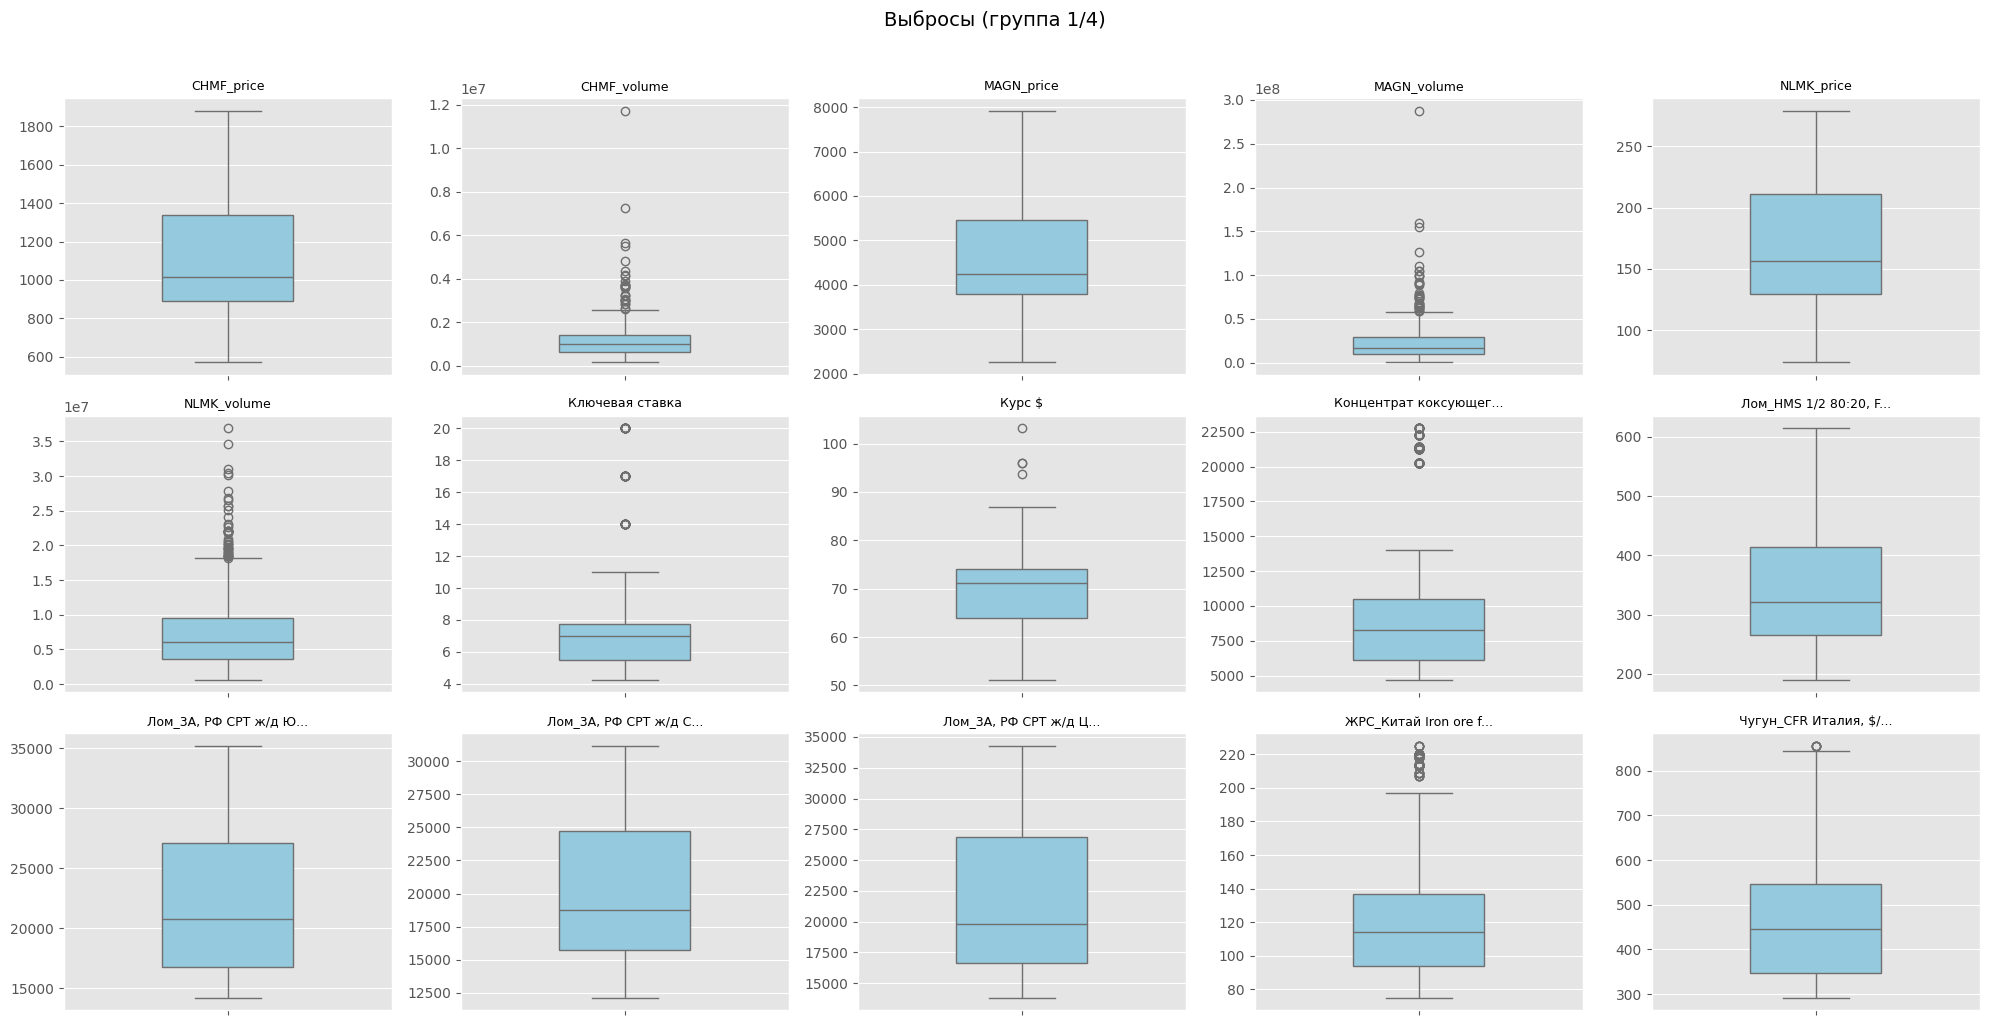

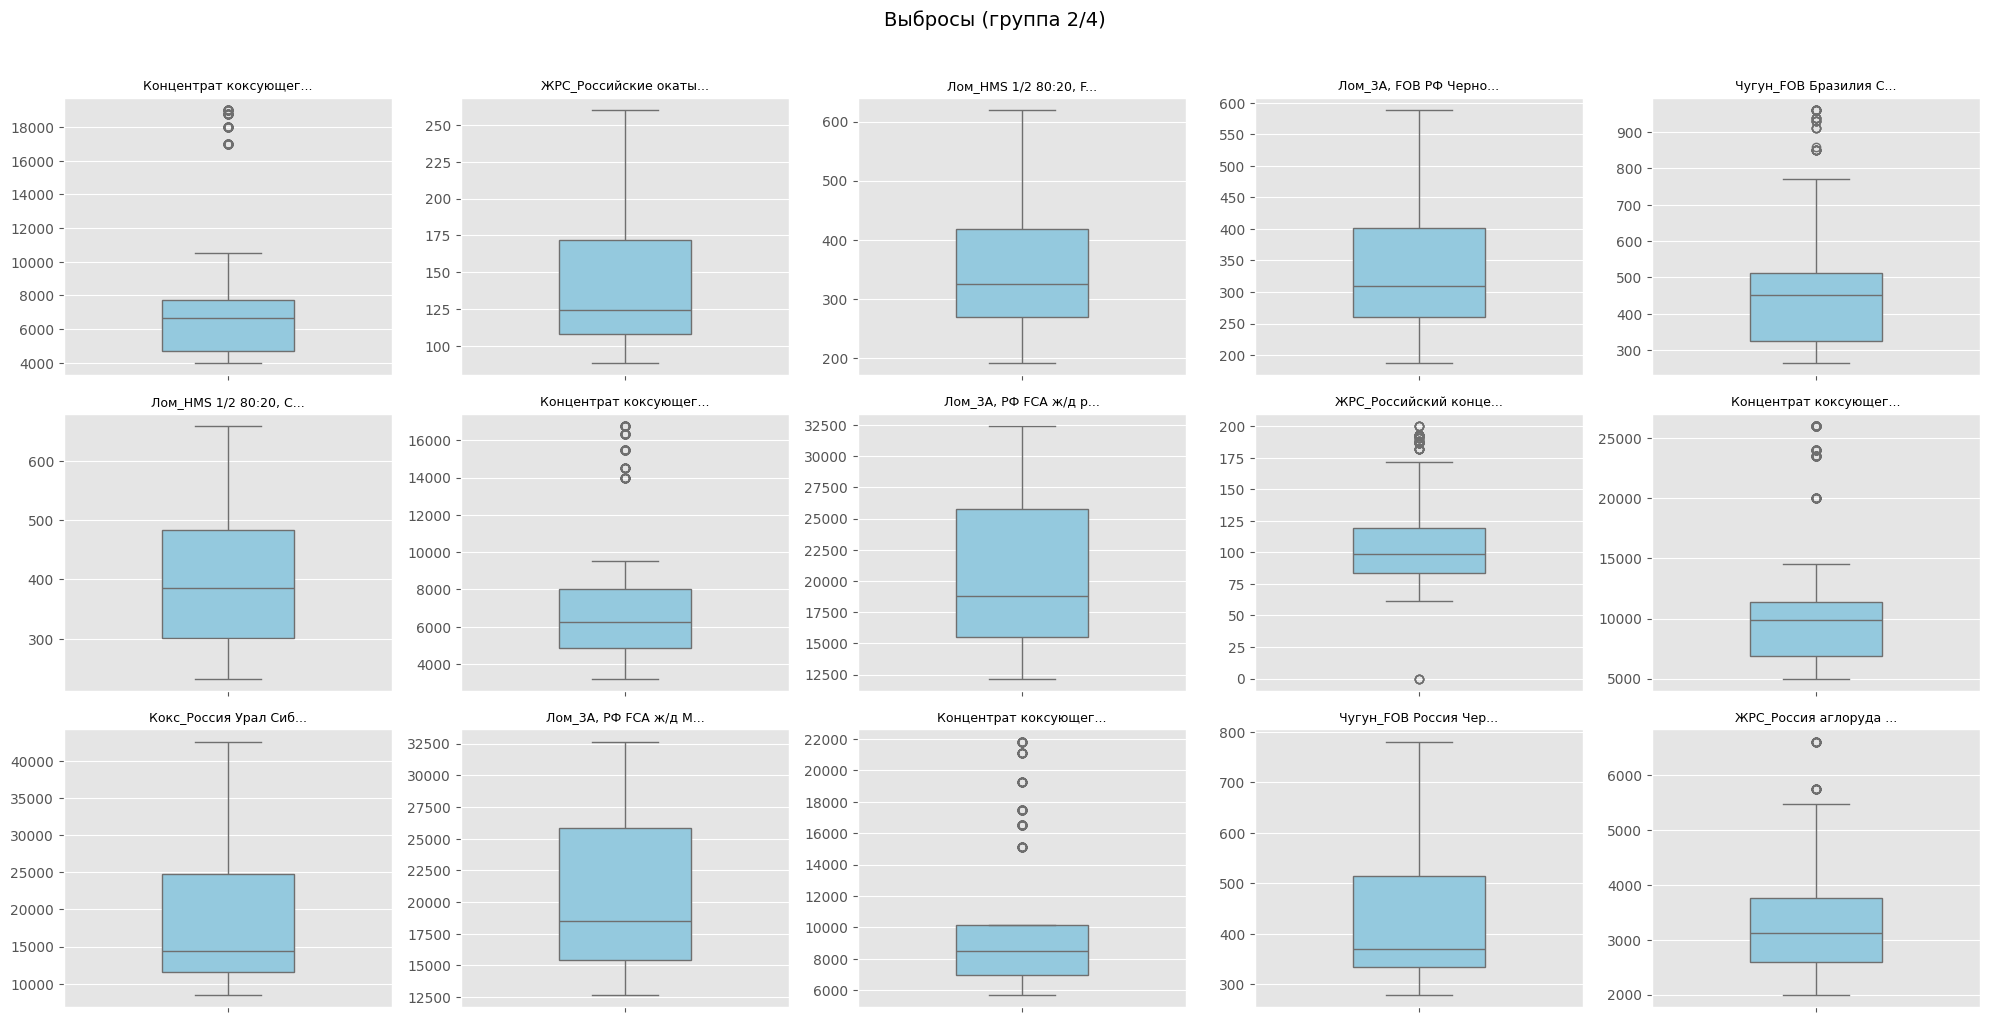

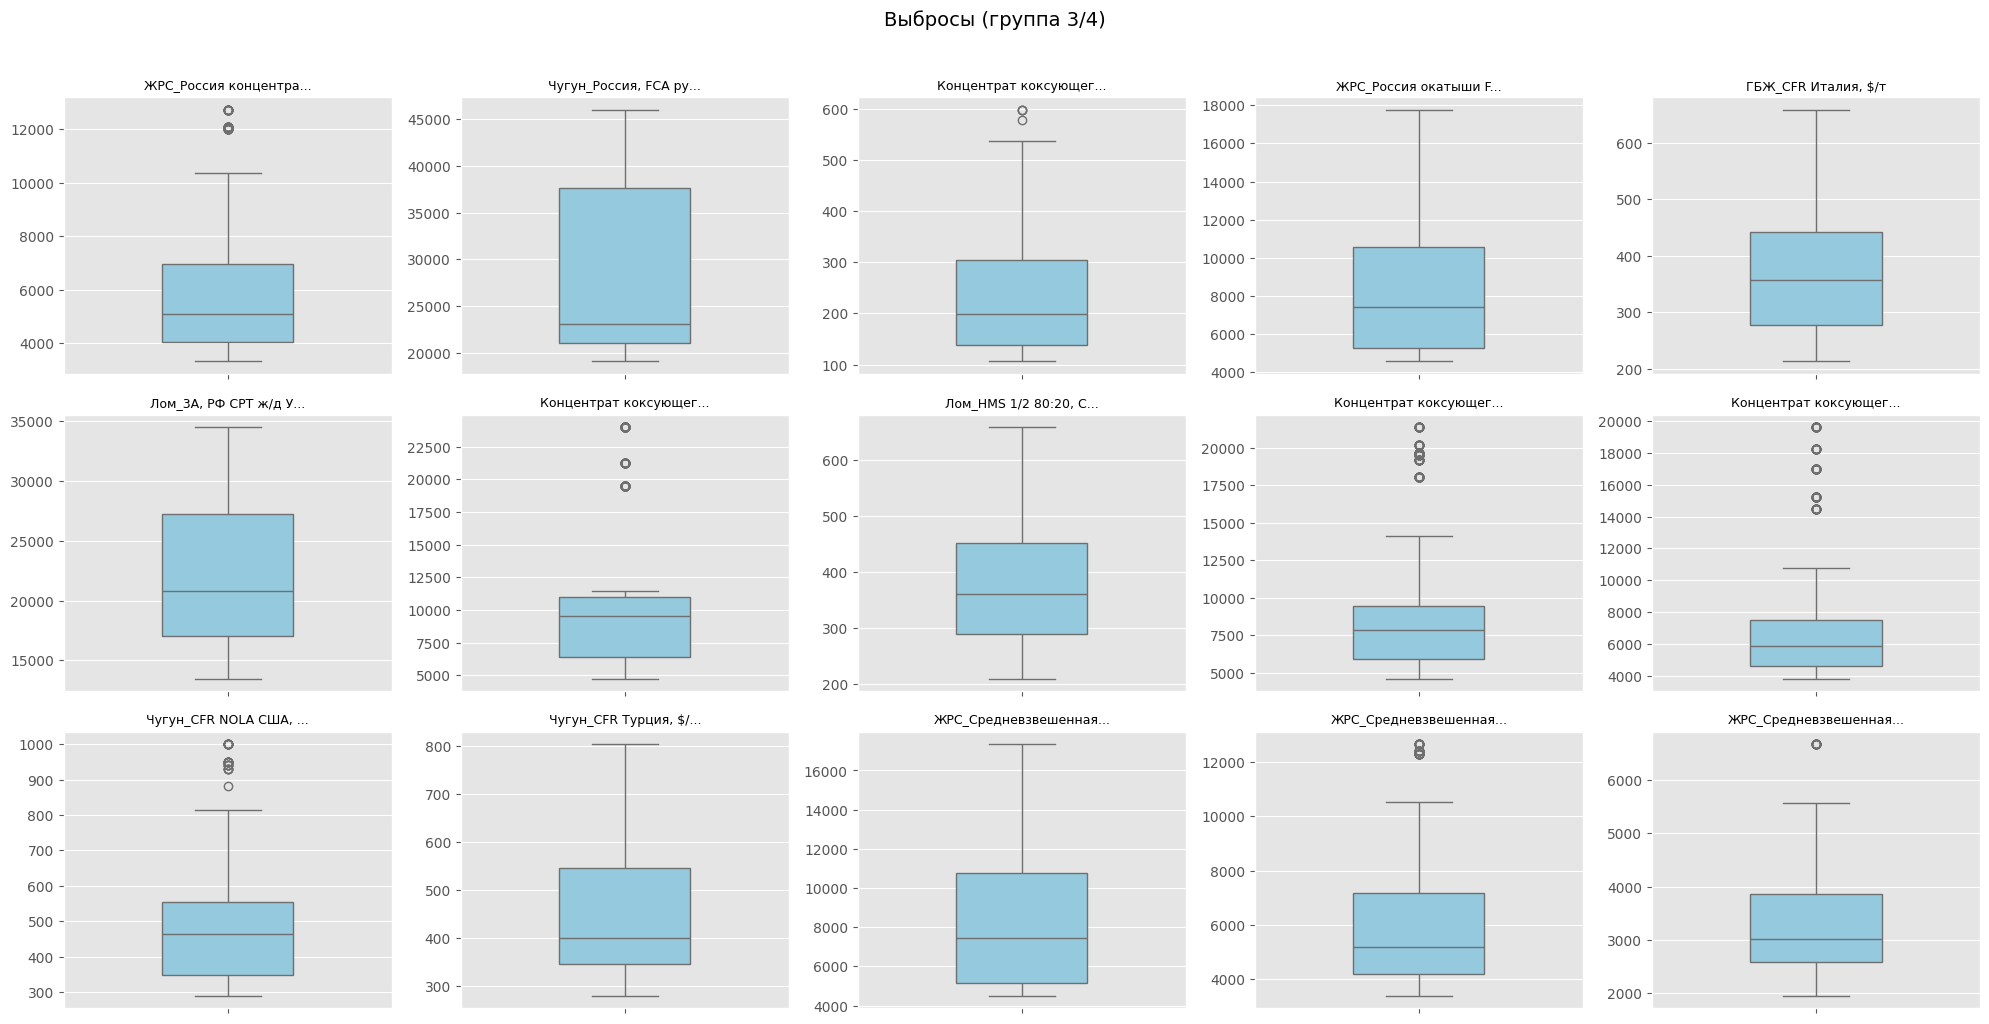

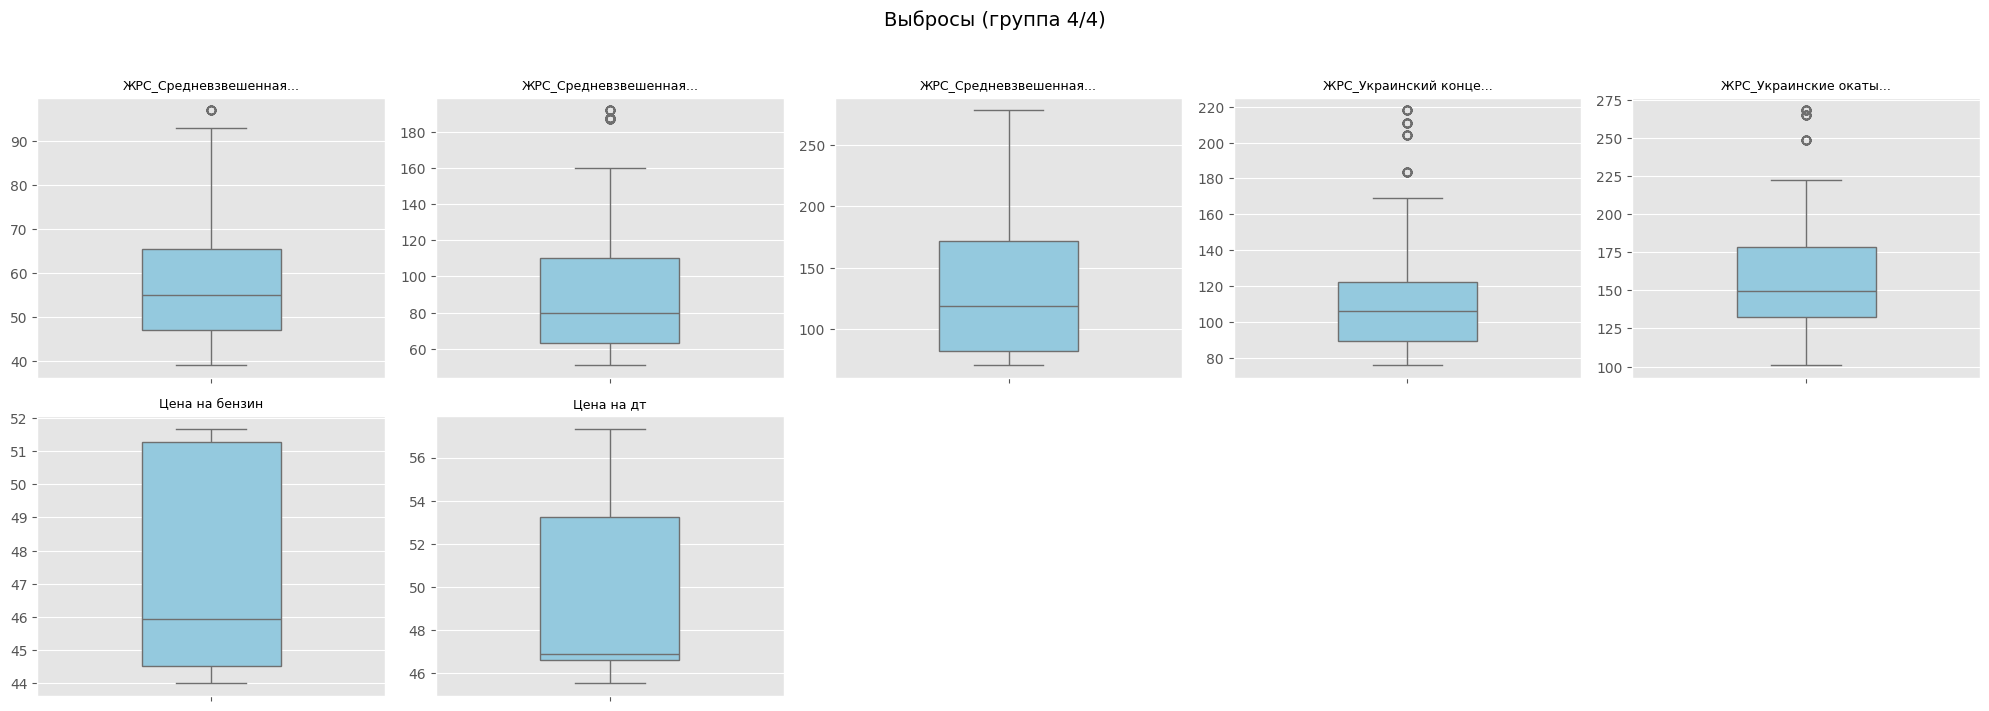

(1051, 53)
(697, 53)


In [163]:
numeric_cols = merged_df.columns[merged_df.columns != 'dt'].tolist()
plot_outliers(merged_df, numeric_cols)

cleaned_iqr = remove_outliers_iqr(merged_df, numeric_cols)
cleaned_iqr.to_csv('merged_df.csv', index=False)

print(merged_df.shape)
print(cleaned_iqr.shape)

merged_df = pd.read_csv('merged_df.csv')

Проверка типов данных в датафрейме и преобразование столбца "dt" в datetime

In [164]:
merged_df['dt'] = pd.to_datetime(merged_df['dt'])
dtype_dict = merged_df.dtypes.astype(str).to_list()
print(set(dtype_dict))

{'float64', 'datetime64[ns]'}


Преобразование данных к стационарности

In [165]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from IPython.display import display
import numpy as np

# Загрузка данных с явным указанием формата даты
df = pd.read_csv('merged_df.csv', parse_dates=['dt'], dayfirst=False)
df.set_index('dt', inplace=True)

# Улучшенная функция проверки стационарности
def check_stationarity(series, max_lag=None):
    """Расширенный тест Дики-Фуллера с настройкой параметров"""
    result = adfuller(
        series.dropna(),
        autolag='AIC',  # Используем AIC для выбора оптимального лага
        maxlag=max_lag
    )
    return result[1]

def make_stationary(series, max_diff=3, alpha=0.05):
    """Рекурсивное дифференцирование до достижения стационарности"""
    diffs = 0
    current_series = series.copy()
    
    for _ in range(max_diff):
        p_value = check_stationarity(current_series)
        if p_value < alpha:
            return current_series, diffs, p_value
        
        # Применяем дифференцирование
        current_series = current_series.diff().dropna()
        diffs += 1
    
    # Если не достигли стационарности
    return None, diffs, p_value

# Обработка данных
results = []
stationary_data = pd.DataFrame(index=df.index)

for col in df.columns:
    original_series = df[col]
    
    # Пропускаем полностью пустые колонки
    if original_series.isna().all():
        continue
        
    # Заполняем пропуски линейной интерполяцией
    filled_series = original_series.interpolate(method='time').ffill().bfill()
    
    # Применяем преобразования
    transformed_series, n_diffs, p_value = make_stationary(filled_series)
    
    if transformed_series is not None:
        stationary_data[col] = transformed_series
        transform_status = f'Успешно ({n_diffs} дифф.)'
        final_p = p_value
    else:
        stationary_data[col] = np.nan
        transform_status = 'Не удалось'
        final_p = np.nan

    results.append({
        'Колонка': col,
        'Исходных пропусков': original_series.isna().sum(),
        'Порядок дифференцирования': n_diffs,
        'Финальный p-value': round(final_p, 4) if not np.isnan(final_p) else '-',
        'Результат': transform_status
    })

# Удаление колонок, которые не удалось стабилизировать
stationary_data = stationary_data.dropna(axis=1, how='all')

# Удаление оставшихся пропусков
stationary_data = stationary_data.dropna()

# Сохранение результатов
stationary_data.reset_index().to_csv('optimized_transformed_data.csv', index=False)

# Анализ результатов
results_df = pd.DataFrame(results)
display(results_df[['Колонка', 'Исходных пропусков', 'Порядок дифференцирования', 'Финальный p-value', 'Результат']])

# Дополнительная аналитика
print("\nСтатистика обработки:")
print(f"Обработано колонок: {len(results_df)}")
print(f"Успешно преобразовано: {results_df[results_df['Результат'].str.contains('Успешно')].shape[0]}")
print(f"Оставшиеся колонки: {stationary_data.shape[1]}")

,Колонка,Исходных пропусков,Порядок дифференцирования,Финальный p-value,Результат
0,CHMF_price,0,1,0.0000,Успешно (1 дифф.)
1,CHMF_volume,0,0,0.0000,Успешно (0 дифф.)
2,MAGN_price,0,0,0.0082,Успешно (0 дифф.)
3,MAGN_volume,0,1,0.0000,Успешно (1 дифф.)
4,NLMK_price,0,1,0.0000,Успешно (1 дифф.)
5,NLMK_volume,0,0,0.0008,Успешно (0 дифф.)
6,Ключевая ставка,0,1,0.0000,Успешно (1 дифф.)
7,Курс $,0,1,0.0000,Успешно (1 дифф.)
8,Концентрат коксующегося угля_Россия марка ОС F...,0,1,0.0001,Успешно (1 дифф.)
9,"Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т",0,1,0.0000,Успешно (1 дифф.)



Статистика обработки:
Обработано колонок: 52
Успешно преобразовано: 52
Оставшиеся колонки: 52


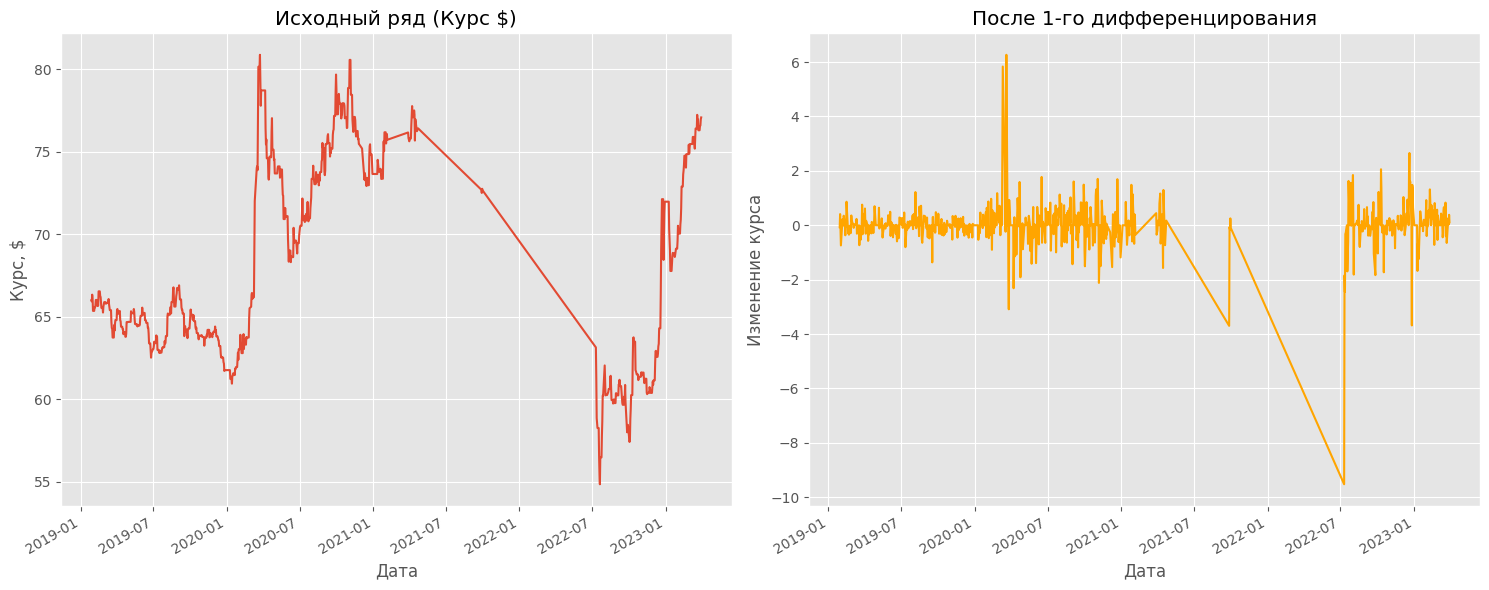

In [166]:
target_col = 'Курс $'

if target_col in stationary_data:
    # Получаем данные для визуализации
    filled_series = df[target_col].interpolate(method='time').ffill().bfill()
    transformed_series = stationary_data[target_col]
    
    # Получаем порядок дифференцирования
    diff_order = results_df[results_df['Колонка'] == target_col]['Порядок дифференцирования'].values[0]
    
    # Настраиваем графики
    plt.figure(figsize=(15, 6))
    
    # Исходные данные
    plt.subplot(1, 2, 1)
    filled_series.plot(title=f'Исходный ряд ({target_col})')
    plt.xlabel('Дата')
    plt.ylabel('Курс, $')
    
    # После преобразования
    plt.subplot(1, 2, 2)
    transformed_series.plot(title=f'После {diff_order}-го дифференцирования', color='orange')
    plt.xlabel('Дата')
    plt.ylabel('Изменение курса')
    
    plt.tight_layout()
    plt.show()
    
else:
    print(f'Колонка {target_col} не была стационаризована')

Метрики

In [167]:
train = pd.read_csv('traintest\\train.csv', parse_dates=['dt'])
transformed = pd.read_csv('optimized_transformed_data.csv', parse_dates=['dt'])
test = pd.read_csv('traintest\\test.csv', parse_dates=['dt'])

In [168]:
train['dt'] = pd.to_datetime(train['dt'])
train['Цена на арматуру'] = train['Цена на арматуру'].astype('float')


test['dt'] = pd.to_datetime(test['dt'])
test['Цена на арматуру'] = test['Цена на арматуру'].astype('float')

In [169]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from tqdm import tqdm

# Оптимизированная функция расчета N
def calculate_optimal_N(prices, max_N=6):
    prices_array = prices.values
    n = len(prices_array)
    cum_sum = np.concatenate([[0], np.cumsum(prices_array)])
    N_list = []
    
    for i in range(n):
        best_K = 1
        best_saving = 0.0
        max_possible_K = min(max_N, n - i)
        
        for K in range(1, max_possible_K + 1):
            sum_K = cum_sum[i + K] - cum_sum[i]
            saving = sum_K - K * prices_array[i]
            if saving > best_saving or (saving == best_saving and K > best_K):
                best_K = K
                best_saving = saving
        
        N_list.append(best_K)
    
    return N_list

# Агрегация данных до недельного уровня
transformed_weekly = transformed.resample('W-MON', on='dt').last().reset_index()

# Объединение данных
merged_train = pd.merge(train, transformed_weekly, on='dt', how='left')
merged_test = pd.merge(test, transformed_weekly, on='dt', how='left')

merged_train['N'] = calculate_optimal_N(merged_train['Цена на арматуру'])

# Объединение трейна и теста для корректных лагов
full_data = pd.concat([merged_train, merged_test], ignore_index=True).sort_values('dt')

# Создание лагов и скользящих средних
for lag in [1, 2, 3, 4]:
    full_data[f'price_lag_{lag}'] = full_data['Цена на арматуру'].shift(lag)
    full_data[f'price_diff_{lag}'] = full_data['Цена на арматуру'].diff(lag)

full_data['rolling_mean_3'] = full_data['Цена на арматуру'].rolling(3).mean()
full_data['rolling_std_4'] = full_data['Цена на арматуру'].rolling(4).std()

# Разделение данных
train_data = full_data[full_data['dt'].isin(merged_train['dt'])].dropna()
test_data = full_data[full_data['dt'].isin(merged_test['dt'])].fillna(method='ffill')

features = [col for col in full_data.columns if col not in ['dt', 'N', 'Цена на арматуру']]
X_train = train_data[features]
y_train = train_data['N'].astype(int)
X_test = test_data[features]

# Определение сетки гиперпараметров для Grid Search
param_grid = {
    'depth': [6, 7, 8],
    'learning_rate': [0.03, 0.05, 0.07],
    'l2_leaf_reg': [1, 3, 5]
}

# Создание и обучение модели с Grid Search
model = CatBoostClassifier(
    iterations=1000,
    loss_function='MultiClass',
    verbose=100,
    early_stopping_rounds=50
)

grid_search_result = model.grid_search(
    param_grid,
    X=X_train,
    y=y_train,
    cv=3,
    plot=True,
    verbose=100
)

# Функция для прогнозирования с индикатором прогресса
def predict_with_progress(model, X):
    predictions = []
    batch_size = 100
    for i in tqdm(range(0, len(X), batch_size), desc="Predicting", unit="batch"):
        batch = X[i:i+batch_size]
        predictions.extend(model.predict(batch))
    return np.array(predictions)

test_preds = predict_with_progress(model, X_test)
test_data['N'] = test_preds.astype(int)

print(f"Total cost: {decision_prices(test_data)}")

# Визуализация результатов
import matplotlib.pyplot as plt

def plot_model_performance(test_data):
    test_prices = test_data['Цена на арматуру']
    test_data['true_N'] = calculate_optimal_N(test_prices)
    
    plt.figure(figsize=(15, 7))
    
    plt.subplot(2, 1, 1)
    plt.plot(test_data['dt'], test_data['N'], label='Predicted N', marker='o')
    plt.plot(test_data['dt'], test_data['true_N'], label='Optimal N', linestyle='--', marker='x')
    plt.title('Сравнение предсказанных и оптимальных N')
    plt.ylabel('N')
    plt.legend()
    plt.grid(True)
    
    accuracy = (test_data['N'] == test_data['true_N']).mean()
    print(f'Точность (Accuracy): {accuracy:.2%}')

plot_model_performance(test_data)

ModuleNotFoundError: No module named 'catboost'

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_data['true_N'], test_data['N'])
print(f"MAE: {mae}")  # Output: MAE: 0.5

MAE: 1.2142857142857142


MAE: 956.61
RMSE: 1392.01


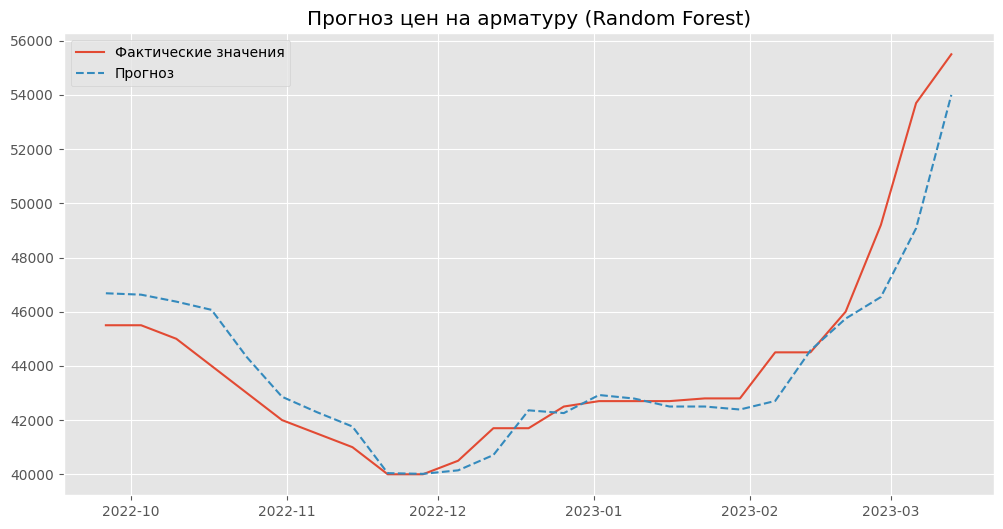


Важность признаков:
        Признак  Важность
3  rolling_mean  0.607852
0         lag_1  0.385540
2         lag_3  0.004089
1         lag_2  0.002519


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Загрузка данных
train = pd.read_csv('traintest\\train.csv', 
                   parse_dates=['dt'], 
                   index_col="dt")

test = pd.read_csv('traintest\\test.csv',
                  parse_dates=['dt'],
                  index_col='dt')

# Указать название целевой колонки
target_column = 'Цена на арматуру'  

# Подготовка данных
def prepare_data(df, target_col, window=3):
    '''Создание лаговых признаков'''
    df = df.copy()
    for i in range(1, window+1):
        df[f'lag_{i}'] = df[target_col].shift(i)
    df['rolling_mean'] = df[target_col].rolling(window).mean()
    df.dropna(inplace=True)
    return df

# Применение к тренировочным данным
train_processed = prepare_data(train, target_column)

# Разделение на признаки и целевую переменную
X = train_processed.drop(columns=[target_column])
y = train_processed[target_column]

# Обучение модели
model = RandomForestRegressor(
    n_estimators=100,  # Количество деревьев
    max_depth=10,      # Максимальная глубина
    random_state=42
)

model.fit(X, y)

# Прогнозирование на тестовых данных
# Подготовка тестовых данных


test_processed = prepare_data(test, target_column)

X_test = test_processed.drop(columns=[target_column])
y_test = test_processed[target_column]

# Предсказание
y_pred = model.predict(X_test)

# Оценка модели
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')

# Визуализация
plt.figure(figsize=(12,6))
plt.plot(test_processed.index, y_test, label='Фактические значения')
plt.plot(test_processed.index, y_pred, label='Прогноз', linestyle='--')
plt.title('Прогноз цен на арматуру (Random Forest)')

plt.legend()
plt.grid(True)
plt.show()

# Важность признаков
feature_importance = pd.DataFrame({
    'Признак': X.columns,
    'Важность': model.feature_importances_
}).sort_values('Важность', ascending=False)

print('\nВажность признаков:')
print(feature_importance.head(10))

MAE: 7166.07
RMSE: 9405.11


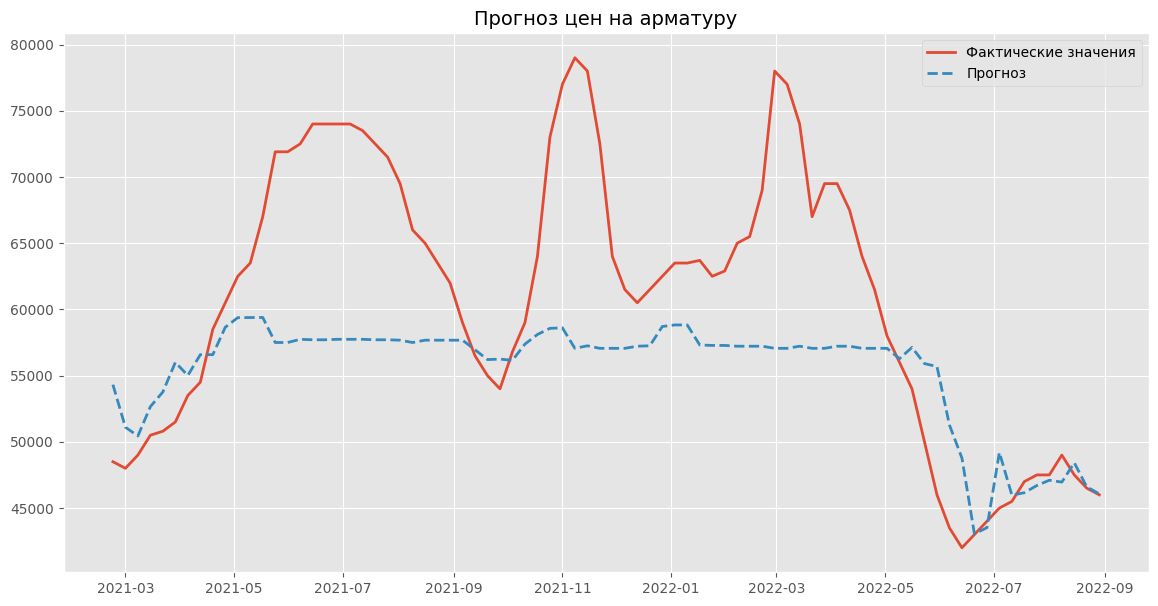


Топ-10 важных признаков:
                                              Признак  Важность
55                                       rolling_mean  0.739780
52                                              lag_1  0.208969
2                                          MAGN_price  0.022174
53                                              lag_2  0.008046
56                                        rolling_std  0.004827
54                                              lag_3  0.003930
5                                         NLMK_volume  0.002627
43  ЖРС_Средневзвешенная цена концентрат Fe 64-68%...  0.002438
30  ЖРС_Россия концентрат Fe 64-68%, FCA руб./т, б...  0.001258
1                                         CHMF_volume  0.000912


In [ ]:
# Загрузка
train = pd.read_csv('traintest\\train.csv', parse_dates=["dt"], index_col="dt")
transformed = pd.read_csv('optimized_transformed_data.csv', parse_dates=["dt"], index_col="dt")

# Объединение
merged_data = train.merge(transformed, 
                         left_index=True, 
                         right_index=True, 
                         how="left")

# Обработка пропусков
merged_data = merged_data.ffill()

merged_data.to_csv("merged_data.csv")



# Загрузка и объединение данных
def load_and_preprocess_data():
    # Загрузка данных
    train = pd.read_csv('traintest\\train.csv', parse_dates=['dt'], index_col='dt')
    transformed = pd.read_csv('optimized_transformed_data.csv', parse_dates=['dt'], index_col='dt')
    
    # Объединение данных
    merged_data = train.join(transformed, how='left')
    
    # Обработка пропусков
    merged_data.ffill(inplace=True)
    merged_data.bfill(inplace=True)
    
    return merged_data

# Подготовка временного ряда
def prepare_time_series(data, target_col, test_size=0.2, window=3):
    # Создание лаговых признаков
    for i in range(1, window+1):
        data[f'lag_{i}'] = data[target_col].shift(i)
    
    # Скользящие статистики
    data['rolling_mean'] = data[target_col].rolling(window).mean()
    data['rolling_std'] = data[target_col].rolling(window).std()
    
    # Временные мета-признаки
    data['day_of_week'] = data.index.dayofweek
    data['month'] = data.index.month
    
    # Удаление пропусков
    data.dropna(inplace=True)
    
    # Разделение на train/test
    split_idx = int(len(data) * (1 - test_size))
    train = data.iloc[:split_idx]
    test = data.iloc[split_idx:]
    
    return train, test

# Обучение и оценка модели
def train_and_evaluate(train, test, target_col):
    # Подготовка данных
    X_train = train.drop(columns=[target_col])
    y_train = train[target_col]
    X_test = test.drop(columns=[target_col])
    y_test = test[target_col]
    
    # Инициализация модели
    model = RandomForestRegressor(
        n_estimators=150,
        max_depth=12,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    )
    
    # Обучение
    model.fit(X_train, y_train)
    
    # Прогнозирование
    y_pred = model.predict(X_test)
    
    # Оценка
    print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
    
    # Визуализация
    plt.figure(figsize=(14, 7))
    plt.plot(test.index, y_test, label='Фактические значения', linewidth=2)
    plt.plot(test.index, y_pred, label='Прогноз', linestyle='--', linewidth=2)
    plt.title('Прогноз цен на арматуру', fontsize=14)
    
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Важность признаков
    feature_importance = pd.DataFrame({
        'Признак': X_train.columns,
        'Важность': model.feature_importances_
    }).sort_values('Важность', ascending=False)
    
    print('\nТоп-10 важных признаков:')
    print(feature_importance.head(10))
    
    return model

# Основной пайплайн
def main():
    target_column = 'Цена на арматуру'
    
    # Загрузка данных
    data = load_and_preprocess_data()
    
    # Проверка наличия целевой колонки
    if target_column not in data.columns:
        raise ValueError(f"Колонка {target_column} не найдена в данных!")
    
    # Подготовка временного ряда
    train, test = prepare_time_series(data, target_column)
    
    # Обучение и оценка модели
    model = train_and_evaluate(train, test, target_column)

if __name__ == "__main__":
    main()


In [ ]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import xgboost as xgb
import joblib 
from datetime import datetime, timedelta

class ProcurementRecommender:
    def __init__(self, master):
        self.master = master
        self.master.title("Рекомендационная система закупок")
        
        # Загрузка модели и данных
        self.load_model_and_data()
        
        # Создание интерфейса
        self.create_widgets()
        self.show_current_price()

    def load_model_and_data(self):
        """Загрузка модели и данных с обработкой исключений"""
        try:
            # Загрузка модели
            # with open('xgboost_model.pkl', 'rb') as f:
            #     self.model = joblib.load(f)  # Или pickle.load(f)
            self.model = model
            
            # Загрузка данных
            self.data = pd.read_csv('Код\\traintest\\train.csv')
            
            # Проверка необходимых колонок
            if 'dt' not in self.data or 'Цена на арматуру' not in self.data:
                raise ValueError("CSV-файл должен содержать колонки 'date' и 'price'")
                
        except Exception as e:
            tk.messagebox.showerror("Ошибка загрузки", f"Ошибка: {str(e)}")
            self.master.destroy()

    def create_widgets(self):
        self.main_frame = ttk.Frame(self.master, padding="15")
        self.main_frame.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))
        
        # Информация о текущей цене
        self.current_price_header = ttk.Label(self.main_frame, 
                                            text="Текущая ситуация на рынке:",
                                            font=('Helvetica', 12, 'bold'))
        self.current_price_header.grid(row=0, column=0, columnspan=2, pady=5, sticky=tk.W)
        
        self.current_price_label = ttk.Label(self.main_frame, text="Цена: ")
        self.current_price_label.grid(row=1, column=0, sticky=tk.W)
        
        self.price_date_label = ttk.Label(self.main_frame, text="Дата: ")
        self.price_date_label.grid(row=1, column=1, sticky=tk.W)
        
        # Кнопка прогноза
        self.predict_button = ttk.Button(self.main_frame, 
                                       text="Получить рекомендацию", 
                                       command=self.predict_recommendation)
        self.predict_button.grid(row=2, column=0, columnspan=2, pady=10)
        
        # Результаты прогноза
        self.recommendation_header = ttk.Label(self.main_frame, 
                                             text="Рекомендация по закупке:",
                                             font=('Helvetica', 12, 'bold'))
        self.recommendation_header.grid(row=3, column=0, columnspan=2, pady=5, sticky=tk.W)
        
        self.forecast_label = ttk.Label(self.main_frame, text="Прогноз цены: ")
        self.forecast_label.grid(row=4, column=0, columnspan=2, sticky=tk.W)
        
        self.recommendation_label = ttk.Label(self.main_frame, 
                                            text="Рекомендуемый объем закупки: ",
                                            font=('Helvetica', 10, 'bold'))
        self.recommendation_label.grid(row=5, column=0, columnspan=2, pady=5, sticky=tk.W)

    def show_current_price(self):
        """Отображает текущую цену и дату"""
        last_row = self.data.iloc[-1]
        current_price = last_row['Цена на арматуру']
        price_date = last_row['dt']
        
        self.current_price_label.config(text=f"Цена: {current_price:.2f} руб/т")
        self.price_date_label.config(text=f"Дата: {price_date}")

    def prepare_features(self):
        """Подготовка данных для прогноза"""
        # Убедитесь, что названия колонок совпадают с тренировочными данными
        features = self.data.tail(7).drop(['dt', 'Цена на арматуру'], axis=1)
        return features  # Возвращаем DataFrame вместо DMatrix

    def predict_recommendation(self):
        """Выполнение прогноза и вывод результатов"""
        try:
            # Получение прогноза
            features = self.prepare_features()
            prediction = self.model.predict(features)
            
            # ... (остальная логика остается без изменений)

        except Exception as e:
            self.recommendation_label.config(
                text=f"Ошибка: {str(e)}",
                foreground="red"
            )

if __name__ == "__main__":
    root = tk.Tk()
    app = ProcurementRecommender(root)
    root.mainloop()

AttributeError: module 'tkinter' has no attribute 'messagebox'